# Aufgabe 12.1

**a) Berechnen Sie die Wahrscheinlichkeit, dass ein besoffener Barbesucher nach
1000 Schritten der Grösse 1m zuhause ankommt, wenn sein Haus 1 km vom
Lokal entfernt ist. Der Besoffene ist so besoffen, dass Sie die Wahrscheinlichkeit, dass er einen Schritt nach rechts macht, gleich gross wie die Wahrscheinlichkeit,
dass er einen Schritt nach links macht, wählen dürfen.**

$X \sim Binom(n, \pi), k=1000, n=1000, \pi=0.5$:

$$
P(X=1000)=\left(\begin{array}{c}{1000} \\ {1000}\end{array}\right) 0.5^{1000}(1-0.5)^{0} \approx 0
$$

In [7]:
from scipy.stats import binom
print(binom.pmf(k=1000, n=1000, p=0.5))

9.332636185032827e-302


**b) Die Position $M_N$ nach $N$ Schritten ist dann gegeben durch
$M_N = X − (N − X)$ wobei $X$ die Anzahl Schritte nach rechts und $(N − X)$ die Anzahl Schritte nach links bezeichnet. Wie gross ist die mittlere Position? Wie gross ist die quadratisch gemittelte Verschiebung $(\equiv
\sqrt{E[M^2_N]})$, die unser Besoffener nach $1000$ Schritten
zurückgelegt hat?**

* $X$ ist die die Anzahl Schritte nach rechts
* $X \sim Bin(N, p)$ mit $N$ = Anzahl Schritte und $p$ die W'keit für einen Schritt nach rechts

Die Position $M_N$ nach $N$ Schritten ist gegeben durch:

$$
M_{N}=X-(N-X) = 2X - N
$$

wobei $X$ die Anzahl Schritte nach rechts und $(N-X)$ Anzahl Schritte nach links bezeichnet. 

Die **mittlere Position** ist also

$$
\mathrm{E}\left[M_{N}\right]=2 \cdot \mathrm{E}[X]-N
$$

Für die Binomialverteilung gilt $E[X] = N\pi$. Somit haben wir mit $N = 1000$ und $p = 0.5$:

$$
\begin{aligned} E[M_N] &=2 \cdot E[X]-N \\ &=2 \cdot N \pi - N \\ &=2 \cdot 1000 \cdot \frac{1}{2} - 1000 = 0 \end{aligned}
$$

Die **mittlere quadratische Verschiebung** ist gegeben durch

$$
\begin{aligned} \sqrt{E[M_{N}^{2}]} &= \sqrt{E\left[(X-(N-X))^{2}\right]} \\
&= \sqrt{E\left[(2 \cdot X-N))^{2}\right]} \\
&= \sqrt{E\left[4X^2 + N^2 - 4XN\right]} \\
&=\sqrt{4 \cdot \mathrm{E}\left[X^{2}\right]+N^{2}-4 \cdot \mathrm{E}[X] \cdot N} \end{aligned}
$$

Nun gilt

$$
\begin{aligned} Var(X) &= N \cdot \pi \cdot q \\
&= \mathrm{E}\left[X^{2}\right]-\mathrm{E}[X]^{2} \\
&=\mathrm{E}\left[X^{2}\right]-(N \cdot \pi)^{2} \end{aligned}
$$

Somit ist $E[X^2] = N \cdot \pi \cdot q + N^2\pi^2$

$$
\sqrt{\mathrm{E}\left[M_{N}^{2}\right]}=\sqrt{4 \cdot\left(N \cdot \pi^{2}+N^{2} \pi^{2}\right)+N^{2}-4 \cdot N^{2} \pi )}
$$

MIt $\pi = 0.5$ ergibt sich $\sqrt{\mathrm{E}\left[M_{N}^{2}\right]}=\sqrt{N}$.

Der Besoffene hat also nach $N = 1000$ Schritten eine quadratisch gemittelte Verschiebung von $\sqrt{E[M^2_N]} = 31.6m$.

**c) Wir betrachten wiederum einen betrunkenen Spaziergänger, der an einem Punkt $x_0$ in einer engen langen Gasse seinen Heimweg antritt. Er setzt seinen Fuss eine Schrittweite $X_1$ von $x_0$ entfernt hin (entweder links oder rechts von $x_0$).
Wir fassen $X_1$ als eine normal-verteilte Zufallsvariable mit Erwartungswert $μ$ und Standardabweichung $\sigma$ auf; somit ist die Position des Spaziergängers nach einem Schritt ebenfalls eine Zufallsvariable und gegeben durch**

$$ S(1) = x_0 + X_1$$

**Nach einem weiteren Schritt der Länge $X_2$ mit demselben Erwartungswert $μ$ und Standardabweichung $\sigma$ ist die Position des Spaziergängers $S(2) = x_0 + X_1 + X_2$. Nach $N$ Schritten ist die Position gegeben durch**

$$
S(N)=x_{0}+\sum_{i=1}^{N} X_{i}
$$

**Bestimmen Sie den Erwartungswert und die Varianz der Position des betrunkenen Spaziergängers nach $N = 1000$ Schritten, also $E[S(N)]$ und $Var[S(N)]$, wobei $x_0 = 0$, $μ = 0$ und $\sigma = 1$ seien. Wie interpretieren Sie den Erwartungswert und die Varianz von $S(N)$?**

$$E[S(N)] = x_0 + E\Big(\sum_{i=1}^N X_i\Big) = x_0 + N\mu = 0$$

$$Var\big(S(N)\big) = Var\Big(\sum_{i=1}^NX_i\Big) = N\sigma^2 = 1000$$

die Standardabweichung ist also $\sqrt{1000} = 31.6$.

**d) Das Beispiel des betrunkenen Spaziergängers ist ein Beispiel für einen (eindimensionalen)
_Random Walk_. Wenn ein Aktienkurs als Random Walk beschrieben
wird, dann ist die kurzzeitige Entwicklung des Aktienwertes zufällig und nicht
vorhersagbar (siehe dazu die Hypothese effizienter Märkte). In untenstehender
Abbildung ist der S&P 500 Kurs (Aktienkurs von 500 führenden Unternehmen)
vom Jahre 2012 - bestehend aus 251 Tagen - aufgezeichnet.**

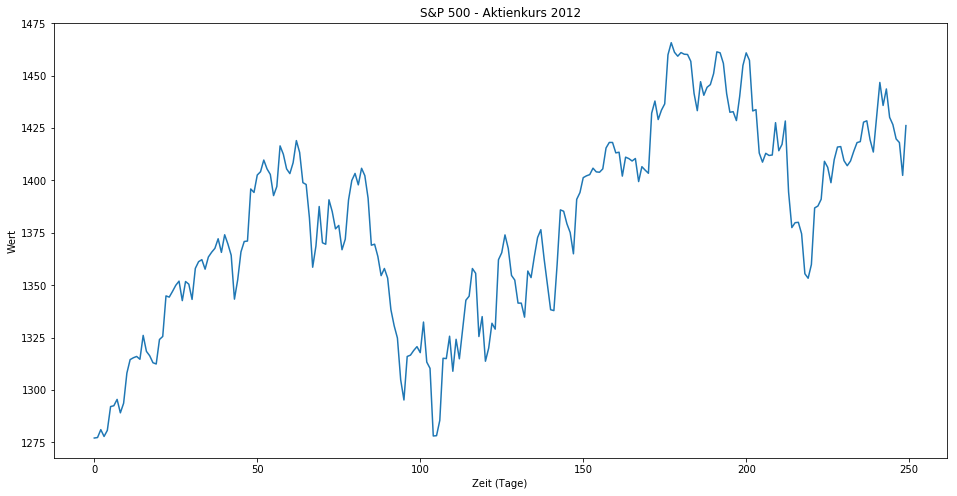

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib

matplotlib.rcParams['figure.figsize'] = [16, 8]

sp2012 = pd.read_table('./data/sp2012.txt')
df = DataFrame(sp2012)
plt.plot(df)
plt.xlabel("Zeit (Tage)")
plt.ylabel("Wert")
plt.title('S&P 500 - Aktienkurs 2012')
plt.show()

DerWerteverlauf von S&P 500 während 2012 beginnt bei einem Wert von 1257.6,
die mittlere Schrittweite beträgt 0.483 und die Standardabweichung der 250
Schrittweiten beträgt 11. Simulieren Sie den Werteverlauf als einen Random
Walk, indem Sie annehmen, dass die Schrittweiten normal-verteilte Zufallsvariablen
mit $μ = 0.483$ und $\sigma = 11$ sind.

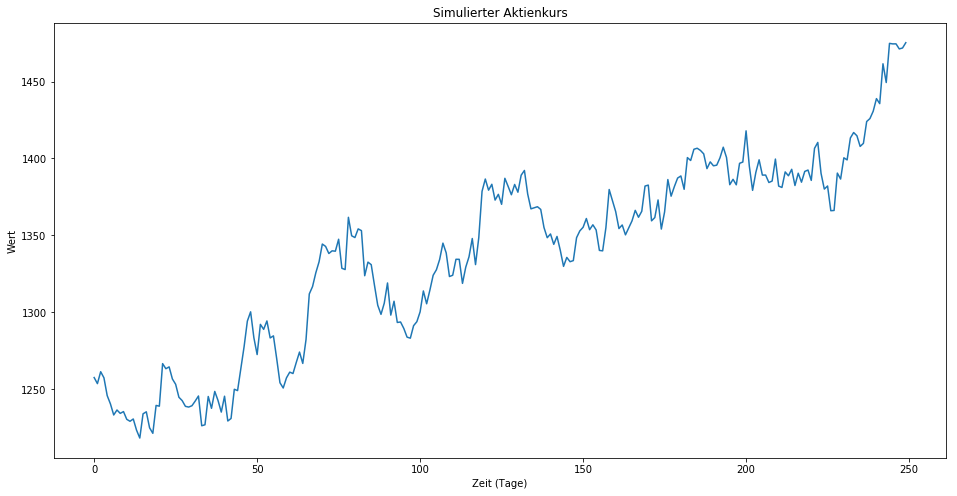

In [20]:
from scipy.stats import norm
steps = np.array(norm.rvs(size = 250, loc=0.483, scale=11))
sp_simulated = np.empty([250])
sp_simulated[0] = 1257.6

for i in range(249):
    sp_simulated[i+1] = sp_simulated[i]+ steps[i]

plt.plot(sp_simulated)
plt.xlabel("Zeit (Tage)")
plt.ylabel("Wert")
plt.title('Simulierter Aktienkurs')
plt.show()

# Aufgabe 12.2

Ein stochastischer Prozess sei definiert durch

$$X(t) = T + (1 - t)$$


wobei $T$ eine über dem Intervall $[0, 1]$ uniform verteilte Zufallsvariable ist.

**a) Bestimmen Sie die Kumulative Verteilungsfunktion von $X(t)$.**

$$ T \sim \mathcal{U}([0,1]) $$

$$P[X(t) \leq x] = P[T \leq x - (1 - t)]$$

Die kumulative Verteilfunktion für $a = 0$ und $b = 1$: 

$$
P[T \leq y]=\left\{\begin{array}{ll}{0} & {y<0} \\ {y} & {0<y<1} \\ {1} & {y>1}\end{array}\right.
$$

Ersetzen wir nun $y$ durch $x − (1 − t)$:

$$
F_{X}(x, t)=P[X(t) \leq x]=P[T \leq x-(1-t)]=\left\{\begin{array}{ll}{0} & {x<(1-t)} \\ {x-(1-t)} & {(1-t)<x<(2-t)} \\ {\mathbb{\mu}} & {x>(2-t)}\end{array}\right.
$$

**b) Bestimmen Sie die Wahrscheinlichkeitsdichtefunktion von $X(t)$.**

$$F_X'(x,t) = f_{X}(x, t)=\frac{d}{d x} F_{X}(x)=\left\{\begin{array}{ll}{1} & {1-t<x<2-t} \\ {0} & {\text { sonst. }}\end{array}\right.
$$

**c) Bestimmen Sie $μ_X(t) = E[X(t)]$.**

Scharmittelwert:

$$
\mu_{X}(t)=\int_{1-t}^{2-t} x \mathrm{d} x=\left.\frac{x^{2}}{2}\right|_{1-t} ^{2-t}=\frac{3}{2}-t
$$

*Alternativ:*

Für $T \sim \mathcal{U}(0,1)$ gilt: $E[T] = \frac{1}{2}, E[T^2] = \frac{1}{3}$:

$$
\mu_{X}(t)=E[X(t)]=\mathrm{E}[T+(1-t)]=1-t+E[T]=\frac{3}{2}-t
$$

**Handelt es sich bei $X(t)$ um einen stationären stochastischen Prozess?**

Der Scharmittelwert ist abhängig von der Zeit, deshalb handelt es sich um einen nicht-stationären Prozess.